### Excercises studyletter 1

### Exercise 1
Import the excel students data

In [1]:
from pyper import *
import feather
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
r = R()
r.has_pandas = True
r.use_dict = True
r('library(ggplot2)')
r('library(xlsx)')
r('library(feather)')
r('library(dplyr)')
r('library(tidyr)')

"try({library(tidyr)})\r\nWarnmeldung:\r\nPaket 'tidyr' wurde unter R Version 3.3.2 erstellt \r\n"

In [3]:
r('students_df<-read.xlsx("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 1 Introduction to data mining/students.xls", sheetIndex=1, encoding=c("UTF-8"))')

'try({students_df<-read.xlsx("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 1 Introduction to data mining/students.xls", sheetIndex=1, encoding=c("UTF-8"))})\r\n'

In [4]:
print(r('head(students_df)'))

> try({head(students_df)})
  Semester           Name             Course Mark Attended
1  FSS2010  Alex Krausche Database Systems I  1.3       13
2  FSS2010   Tanja Becker Database Systems I  2.0       12
3  FSS2010 Mariano Selina Database Systems I  1.7        5
4  FSS2010   Otto Blacher Database Systems I  2.3       13
5  FSS2010   Frank Fester Database Systems I  2.0       13



In [5]:
r('sapply(subset(students_df, select=Semester:Course), as.factor)')


'> print("R command at time: 1487532942.0931685")\r\n[1] "R command at time: 1487532942.0931685"\r\n> try({sapply(subset(students_df, select=Semester:Course), as.factor)})\r\n      Semester  Name              Course                \r\n [1,] "FSS2010" "Alex Krausche"   "Database Systems I"  \r\n [2,] "FSS2010" "Tanja Becker"    "Database Systems I"  \r\n [3,] "FSS2010" "Mariano Selina"  "Database Systems I"  \r\n [4,] "FSS2010" "Otto Blacher"    "Database Systems I"  \r\n [5,] "FSS2010" "Frank Fester"    "Database Systems I"  \r\n'

In [6]:
r('levels_marks<-as.character(unique(select(arrange(students_df, Mark)), Mark))')
r('students_df$Mark<-ordered(students_df$Mark)')
r('levels(students_df$Mark)<-levels_marks')

'[38,] "FSS2010" "Avid Morvita"    "Electronic Markets"  \r\n[39,] "FSS2010" "Steve Queck"     "Electronic Markets"  \r\n[40,] "FSS2010" "Michaela Martke" "Electronic Markets"  \r\n[41,] "FSS2010" "Ulrich Gester"   "Electronic Markets"  \r\n> print("R command at time: 1487532942.1151695")\r\n[1] "R command at time: 1487532942.1151695"\r\n> try({levels_marks<-as.character(unique(select(arrange(students_df, Mark)), Mark))})\r\nError in unique.data.frame(select(arrange(students_df, Mark)), Mark) : \r\n  Objekt \'Mark\' nicht gefunden\r\n> print("R command at time: 1487532942.1251702")\r\n[1] "R command at time: 1487532942.1251702"\r\n> try({students_df$Mark<-ordered(students_df$Mark)})\r\n> print("R command at time: 1487532942.1261704")\r\n[1] "R command at time: 1487532942.1261704"\r\n> try({levels(students_df$Mark)<-levels_marks})\r\nError in try({ : Objekt \'levels_marks\' nicht gefunden\r\n'

In [7]:
print(r('class(students_df$Mark)'))

try({class(students_df$Mark)})
[1] "ordered" "factor" 



In [8]:
r('path<-c("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 1 Introduction to data mining/students.feather")')
# Use feather instead of pyper to pass data from larger dataframes between Python and R and forget Rpy ever existed
r('write_feather(students_df, path)')

'try({write_feather(students_df, path)})\r\n'

In [9]:
r('df <- read_feather(path)')

'try({df <- read_feather(path)})\r\n'

In [10]:
path = "C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 1 Introduction to data mining/students.feather"
students_df = feather.read_dataframe(path)
students_df.head()

,Semester,Name,Course,Mark,Attended
0,FSS2010,Alex Krausche,Database Systems I,1.3,13.0
1,FSS2010,Tanja Becker,Database Systems I,2,12.0
2,FSS2010,Mariano Selina,Database Systems I,1.7,5.0
3,FSS2010,Otto Blacher,Database Systems I,2.3,13.0
4,FSS2010,Frank Fester,Database Systems I,2,13.0


In [11]:
students_df.dtypes

Semester    category
Name        category
Course      category
Mark        category
Attended     float64
dtype: object

### Exercise 1.1
What is the most common mark that has been given in FSS2010?
(Hint: To find the answer filter the examples and draw a histogram afterward.)

In [12]:
marks = students_df.ix[students_df.Semester=="FSS2010","Mark"].value_counts()#.reset_index()
#marks.columns = ["Mark", "Count"]
#marks

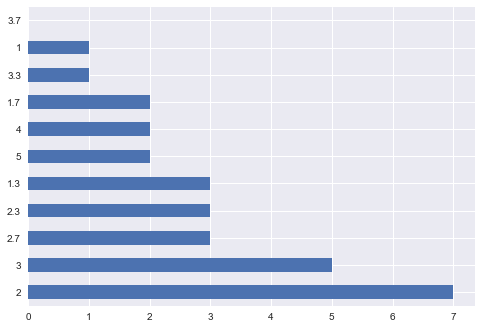

In [13]:
marks.plot(kind="barh")

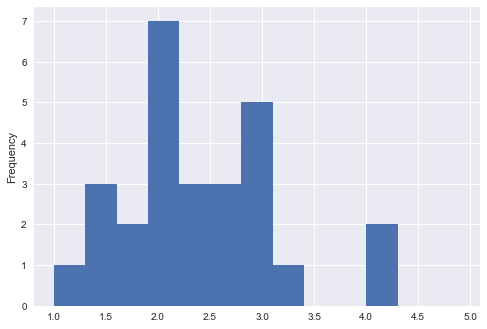

In [14]:
import numpy as np
students_df.ix[students_df.Semester=="FSS2010","Mark"].astype(float).plot(kind="hist", bins=np.arange(1,5,0.3))

### Exercise 1.2
Is there a correlation between the mark and the number of attended classes?
Please determine the answer visually using a scatter plot.

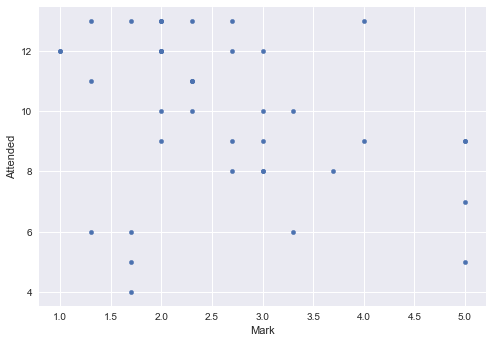

In [15]:
students_df['Mark'] = students_df['Mark'].astype(float)
students_df.plot(kind='scatter', x="Mark", y="Attended")

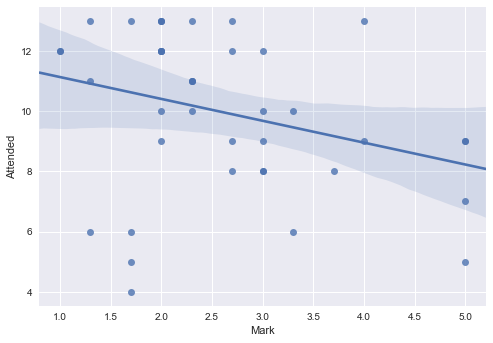

In [16]:
import seaborn as sns
sns.regplot(x=students_df.Mark, y=students_df.Attended)

In [17]:
r('students_df$Mark<-as.numeric(students_df$Mark)')
print(r('data.frame(cor(select(students_df, Mark, Attended)))'))

try({data.frame(cor(select(students_df, Mark, Attended)))})
               Mark   Attended
Mark      1.0000000 -0.2746284
Attended -0.2746284  1.0000000



In [18]:
print(r('summary(lm(Mark ~ Attended, data=students_df))'))

try({summary(lm(Mark ~ Attended, data=students_df))})

Call:
lm(formula = Mark ~ Attended, data = students_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7711 -1.5781 -0.2798  1.3167  5.3167 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.5606     1.7230   4.969 1.38e-05 ***
Attended     -0.2982     0.1672  -1.784   0.0823 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.763 on 39 degrees of freedom
Multiple R-squared:  0.07542,	Adjusted R-squared:  0.05171 
F-statistic: 3.181 on 1 and 39 DF,  p-value: 0.08227




There may be a weak negative correlation, but there is no statistically significant linear relationship. As the relationship is face valid, we may take the regression plot as suggestive of that we may find a negative relationship between mark and attended classes with a larger sample. 

### Execise 1.3 
Does this correlation between the number of attended classes and the final grading hold for all students?
(Hint: Find the answer by aggregating the examples by student and use a
scatter chart afterwards.)

,Median Mark per Student,Attended Classes Total
Median Mark per Student,1.000000,-0.144883
Attended Classes Total,-0.144883,1.000000


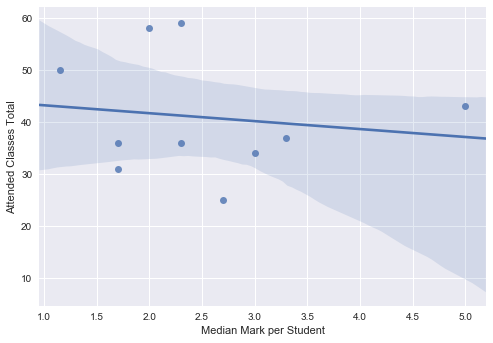

In [19]:
students_df_agg = students_df.groupby("Name").agg({'Mark':np.median, 'Attended':np.sum}).reset_index()
students_df_agg.columns = ['Name', 'Median Mark per Student', 'Attended Classes Total']

sns.regplot(x=students_df_agg['Median Mark per Student'], y=students_df_agg['Attended Classes Total'])
students_df_agg.corr()

This may hold true for all students, but the relationship apperas to be very weak. 

### Exercise 1.4
Using visualization techniques, find out which attribute combinations and
(approximate) value ranges determine the type of Iris flower?

In [20]:
r.iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,b'setosa'
1,4.9,3.0,1.4,0.2,b'setosa'
2,4.7,3.2,1.3,0.2,b'setosa'
3,4.6,3.1,1.5,0.2,b'setosa'
4,5.0,3.6,1.4,0.2,b'setosa'


In [21]:
r.iris.dtypes

 Sepal.Length     float64
 Sepal.Width      float64
 Petal.Length     float64
 Petal.Width      float64
Species            object
dtype: object

In [22]:
r('class(iris$Species)')

'try({class(iris$Species)})\r\n[1] "factor"\r\n'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B764940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BD40AC8>]], dtype=object)

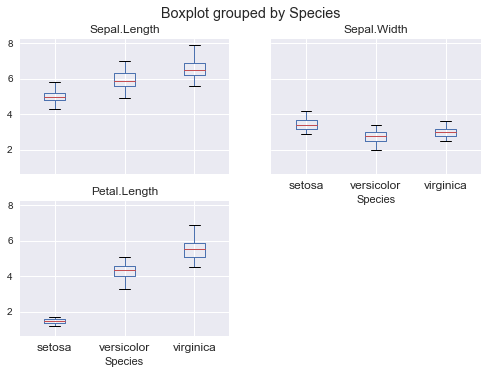

In [23]:
r('path<-c("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 1 Introduction to data mining/iris.feather")')
r('write_feather(iris, path)')
path = "C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 1 Introduction to data mining/iris.feather"
iris = feather.read_dataframe(path)

iris.columns[0:3]
iris.boxplot(column=list(iris.columns[0:3]), by="Species")

#g = sns.FacetGrid(tips, col="time",  row="smoker")
#g = g.map(sns.boxplot, "total_bill", bins=bins, color="r")
#sns.boxplot(x="day", y="total_bill", hue="sex", data=iris)

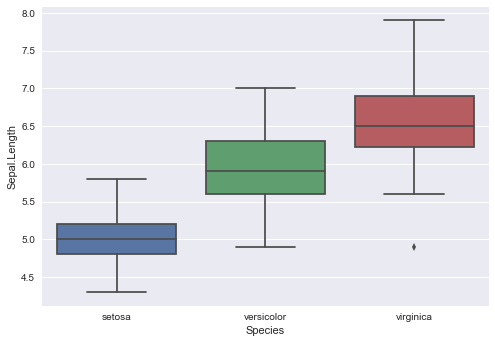

In [35]:
sns.boxplot(y=iris['Sepal.Length'], x=iris.Species)

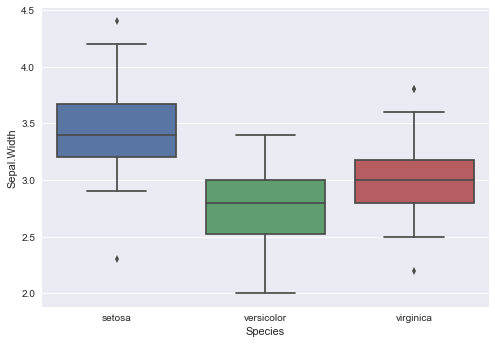

In [36]:
sns.boxplot(y=iris['Sepal.Width'], x=iris.Species)

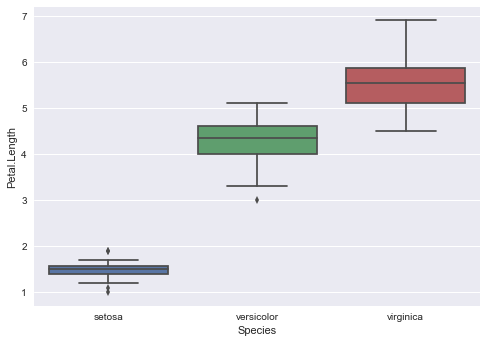

In [37]:
sns.boxplot(y=iris['Petal.Length'], x=iris.Species)

Setosa has a petal length lower than 2 cm, versicolor has a petal length with a range that is lower than the one of virginica. Most records can be distinguished as belonging to versicolor with a Petal length of longer than 3.5 cm but lower than 5 cm whereas virginica tends to have longer versicolor than 5 cm. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C6FB358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C7F6400>]], dtype=object)

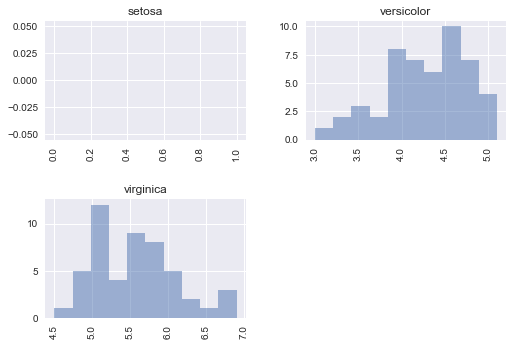

In [56]:
iris_sub = iris.ix[(iris.Species=="versicolor")|(iris.Species=="virginica"),["Species", "Petal.Length"]]
iris_sub.hist(by="Species", alpha=0.5)

### What are the average values for each attribute for each Iris type?

In [69]:
r('iris_gr<-group_by(iris, Species)')
(r('iris_gr<-summarise_each(iris_gr, funs(mean))'))

'try({iris_gr<-summarise_each(iris_gr, funs(mean))})\r\n'

In [70]:
r.iris_gr

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,b'setosa',5.006,3.428,1.462,0.246
1,b'versicolor',5.936,2.770,4.260,1.326
2,b'virginica',6.588,2.974,5.552,2.026
